In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, max_error

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [37]:
x = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_x.csv", header=None)
y = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_y.csv", header=None)
x.shape, y.shape

((387, 5), (387, 1))

In [38]:
x.head()

,0,1,2,3,4
0,0.071841,0.855352,-0.305597,0.028253,1.826895
1,0.139521,-0.423507,0.461059,-0.447400,-0.034988
2,1.626311,-0.257622,-0.697520,1.413219,1.086292
3,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
4,-0.783365,-0.861232,0.951448,-0.117306,0.680597


In [39]:
y.head()

,0
0,63.320498
1,-23.426394
2,11.982771
3,-102.883304
4,-49.373475


In [26]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)

0.9922198026415868

In [27]:
multiple.coef_

array([[15.79537523, 93.21521093, 37.19410687, 31.19129121, -0.23773114]])

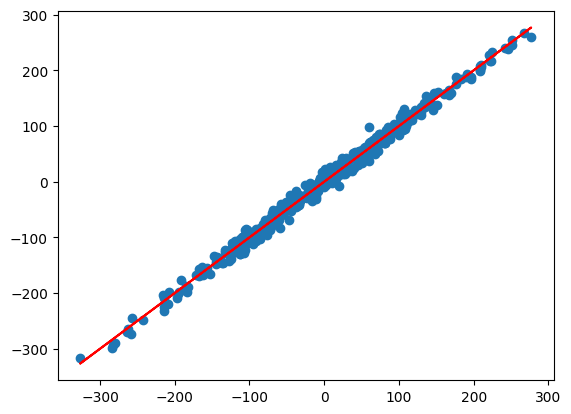

In [28]:
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')

In [29]:
# multiple = LinearRegression()
# x = pd.DataFrame(np.linspace(0, 10))
# x = pd.DataFrame(np.hstack([x, x**2]))
# y = np.sin(x)
# multiple.fit(x, y)
# multiple.score(x, y)

In [31]:
# yy = multiple.predict(x)
# plt.scatter(x, yy)
# plt.plot(x[0], y[0], c='r')

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((309, 5), (78, 5), (309, 1), (78, 1))

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
lin_reg.score(x_test, y_test), lin_reg.coef_

(0.9943109514604994,
 array([[15.85516479, 93.64073786, 37.28406422, 31.20961015, -0.13368487]]))

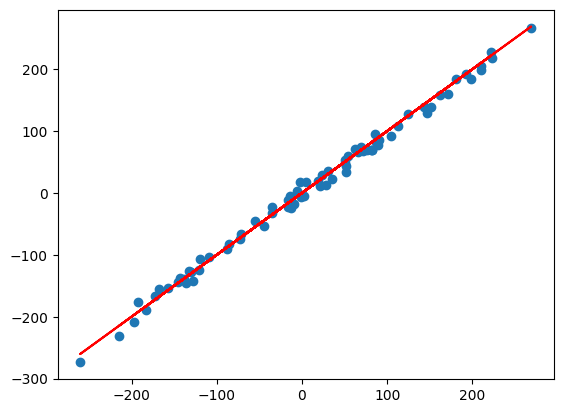

In [34]:
predicted = lin_reg.predict(x_test)
plt.scatter(lin_reg.predict(x_test), y_test)
plt.plot(predicted, predicted, 'r')

График при x[[0]] score: 0.0436


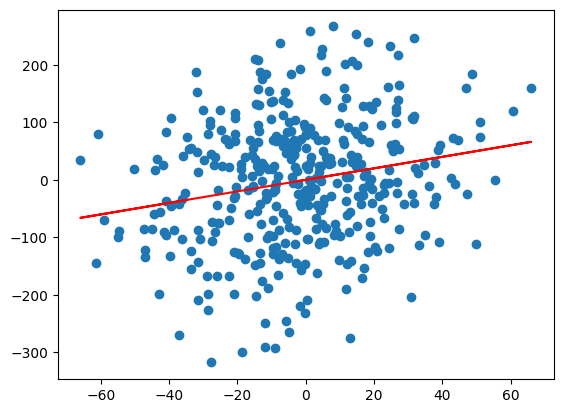

График при x[[1]] score: 0.7700


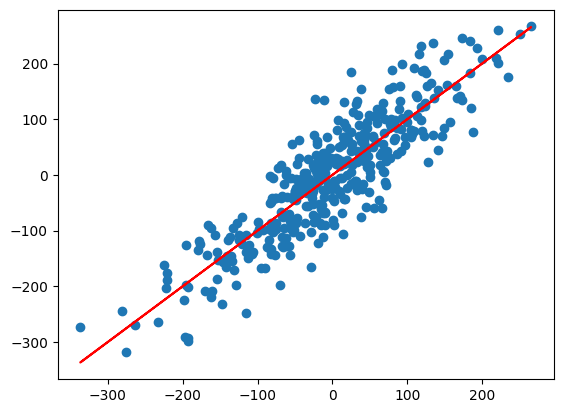

График при x[[2]] score: 0.1879


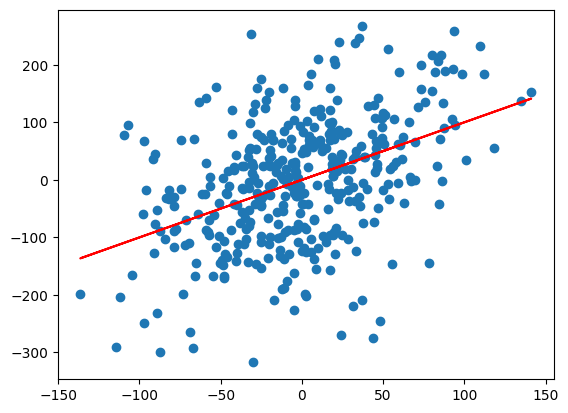

График при x[[3]] score: 0.0475


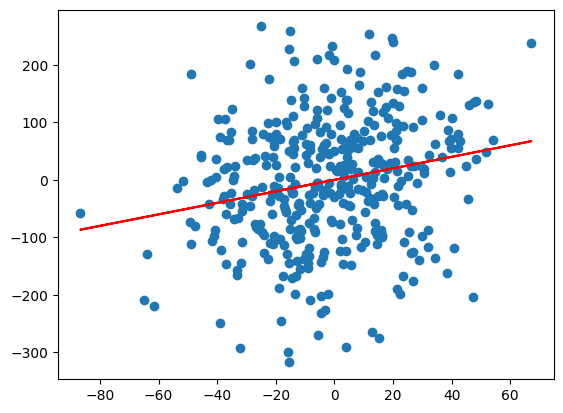

График при x[[4]] score: 0.0002


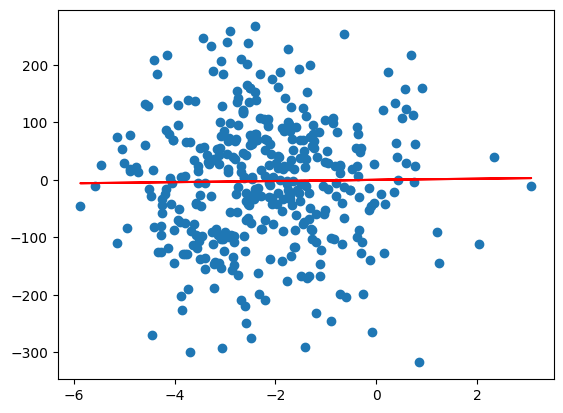

In [35]:
dual = LinearRegression()

for k,v in x.items():
    df = pd.DataFrame(v)
    dual.fit(df, y)
    
    print(f'График при x[[{k}]] score: {dual.score(df, y):.4f}')

    y_pred = dual.predict(df)
    plt.scatter(y_pred, y)
    plt.plot(y_pred, y_pred, c='r')
    plt.show()

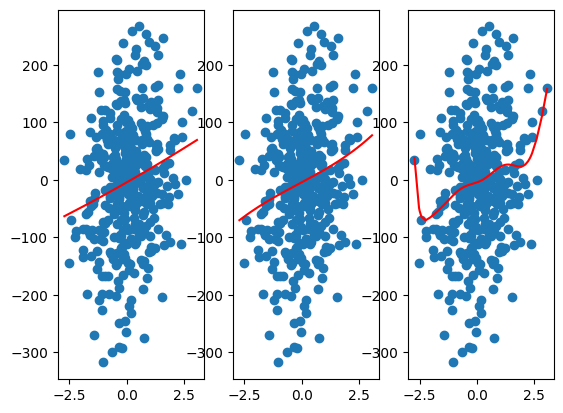

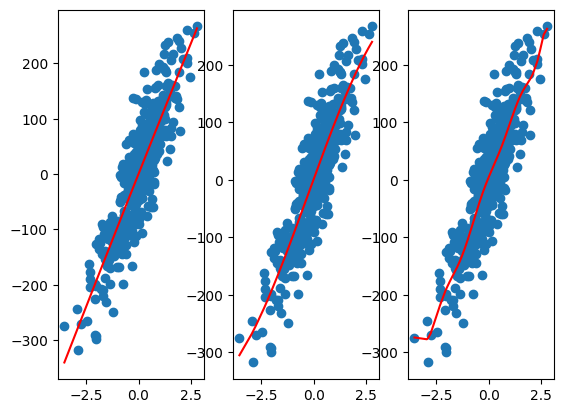

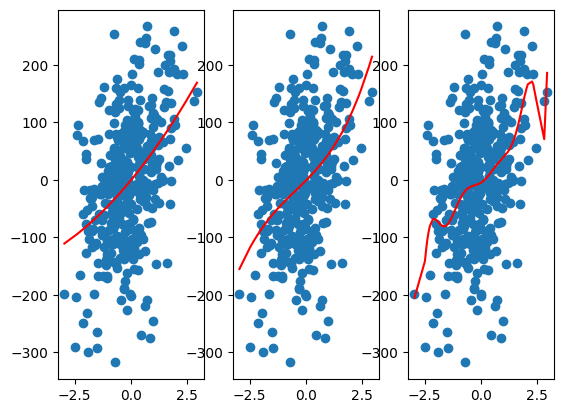

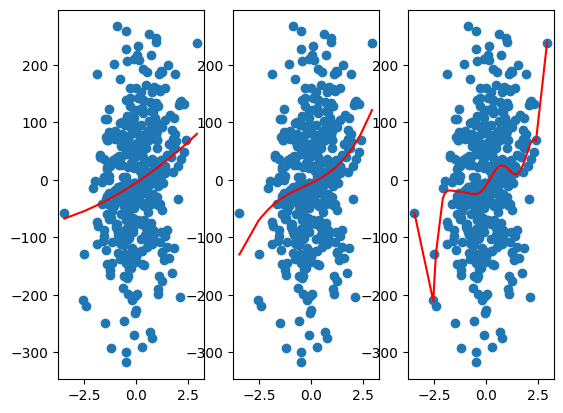

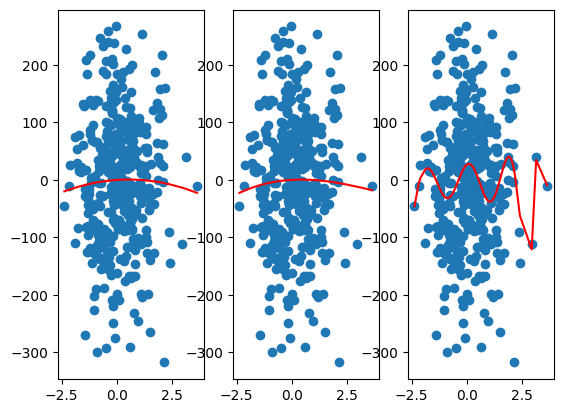

In [40]:
def poly_regr(x, y, degrees):
    inds = x.ravel().argsort()       
    x = x.ravel()[inds].reshape(-1,1)
    y = y.values[inds]
    fig, axs = plt.subplots(1, len(degrees))
    r2, mae, me = [], [], []
    for d in range(len(degrees)):
        poly = PolynomialFeatures(degree=degrees[d])
        poly_features = poly.fit_transform(x)
        poly_reg_model = LinearRegression()
        poly_reg_model.fit(poly_features, y)
        y_predicted = poly_reg_model.predict(poly_features)
        axs[d].scatter(x, y)
        axs[d].plot(x, poly_reg_model.predict(poly_features), color='r')
        r2.append(r2_score(y, y_predicted))
        mae.append(mean_absolute_error(y, y_predicted))
        me.append(max_error(y, y_predicted))
    plt.show()
    return r2, mae, me

stats = []
for i in range(x.shape[1]):
    stats.append(poly_regr(x[[i]].values, y, [2, 3, 10]))